# Assignemt 1. Algerian Forest Fires Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## 1. Data Cleaning and Preprocessing

About the dataset attributes:

-  Date : day, month and year date weather data observations
-  Temp : temperature max in Celsius degrees
-  RH : Relative Humidity in %
-  Ws :Wind speed in km/h
-  Rain: total day in mm
-  Fine Fuel Moisture Code (FFMC) index from the FWI system
-  Duff Moisture Code (DMC) index from the FWI system
-  Drought Code (DC) index from the FWI system
-  Initial Spread Index (ISI) index from the FWI system
-  Buildup Index (BUI) index from the FWI system
-  Fire Weather Index (FWI) Index
-  Classes: two classes, namely Fire and not Fire

In [ ]:
df.shape

(243, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


**Observations:**
- There are no missing values in this dataset; all columns have 243 entries.
- There is only one categorical feature, "Classes," which needs to be converted to numerical values using a encoding method.
- FWI is the primary target variable for this model, representing the continuous Fire Weather Index.

In [ ]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

**Note:**  First, the class labels will be standardized because the feature "Classes" should contain only "fire" and "not fire." Then, one-hot encoding will be used to encode the "Classes" feature due to its binary nature, avoiding any ordinal relationship between the categories.

In [ ]:
# Standardizing class labels
df['Classes'] = df['Classes'].str.strip().str.replace('_', ' ').str.lower()

# Checking the unique classes to confirm
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoded_df = pd.DataFrame(encoder.fit_transform(df[['Classes']]), columns=encoder.get_feature_names_out(['Classes']))

df = pd.concat([df.drop(columns=['Classes']), encoded_df], axis=1)

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,1.0


**Note:** In the next step, the date will be removed. According to research, the calculation of the FWI is based on daily weather observations such as temperature, relative humidity, wind speed, and precipitation,  and FWI components (FFMC, DMC, DC, ISI, BUI) influence the FWI. Specific dates do not influence the FWI.

[Source: Calculation of the FWI](https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi)

In [ ]:
##droping month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,1.0


In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not fire
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942,0.563786,0.436214
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028,0.496938,0.496938
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000,1.000000


**Observations:**
-  "Temperature" has a standard deviation of around 3.63°C, indicating moderate variability.
-  "RH" varies between 21% and 90%, with a mean of 62% showing it varies quite a bit.
-  "Rain" mostly stays low, ranging from 0 to 16.8 mm, and averages just 0.76 mm, suggesting many dry days.
- "FWI" varies significantly from 0 to 31.1, with an average of 7.04, reflecting different fire risk levels.
- "Classes"  are fairly balanced, with around 56% being "fire" and 44% being "not fire".

## 2. Data Visualization and Observations

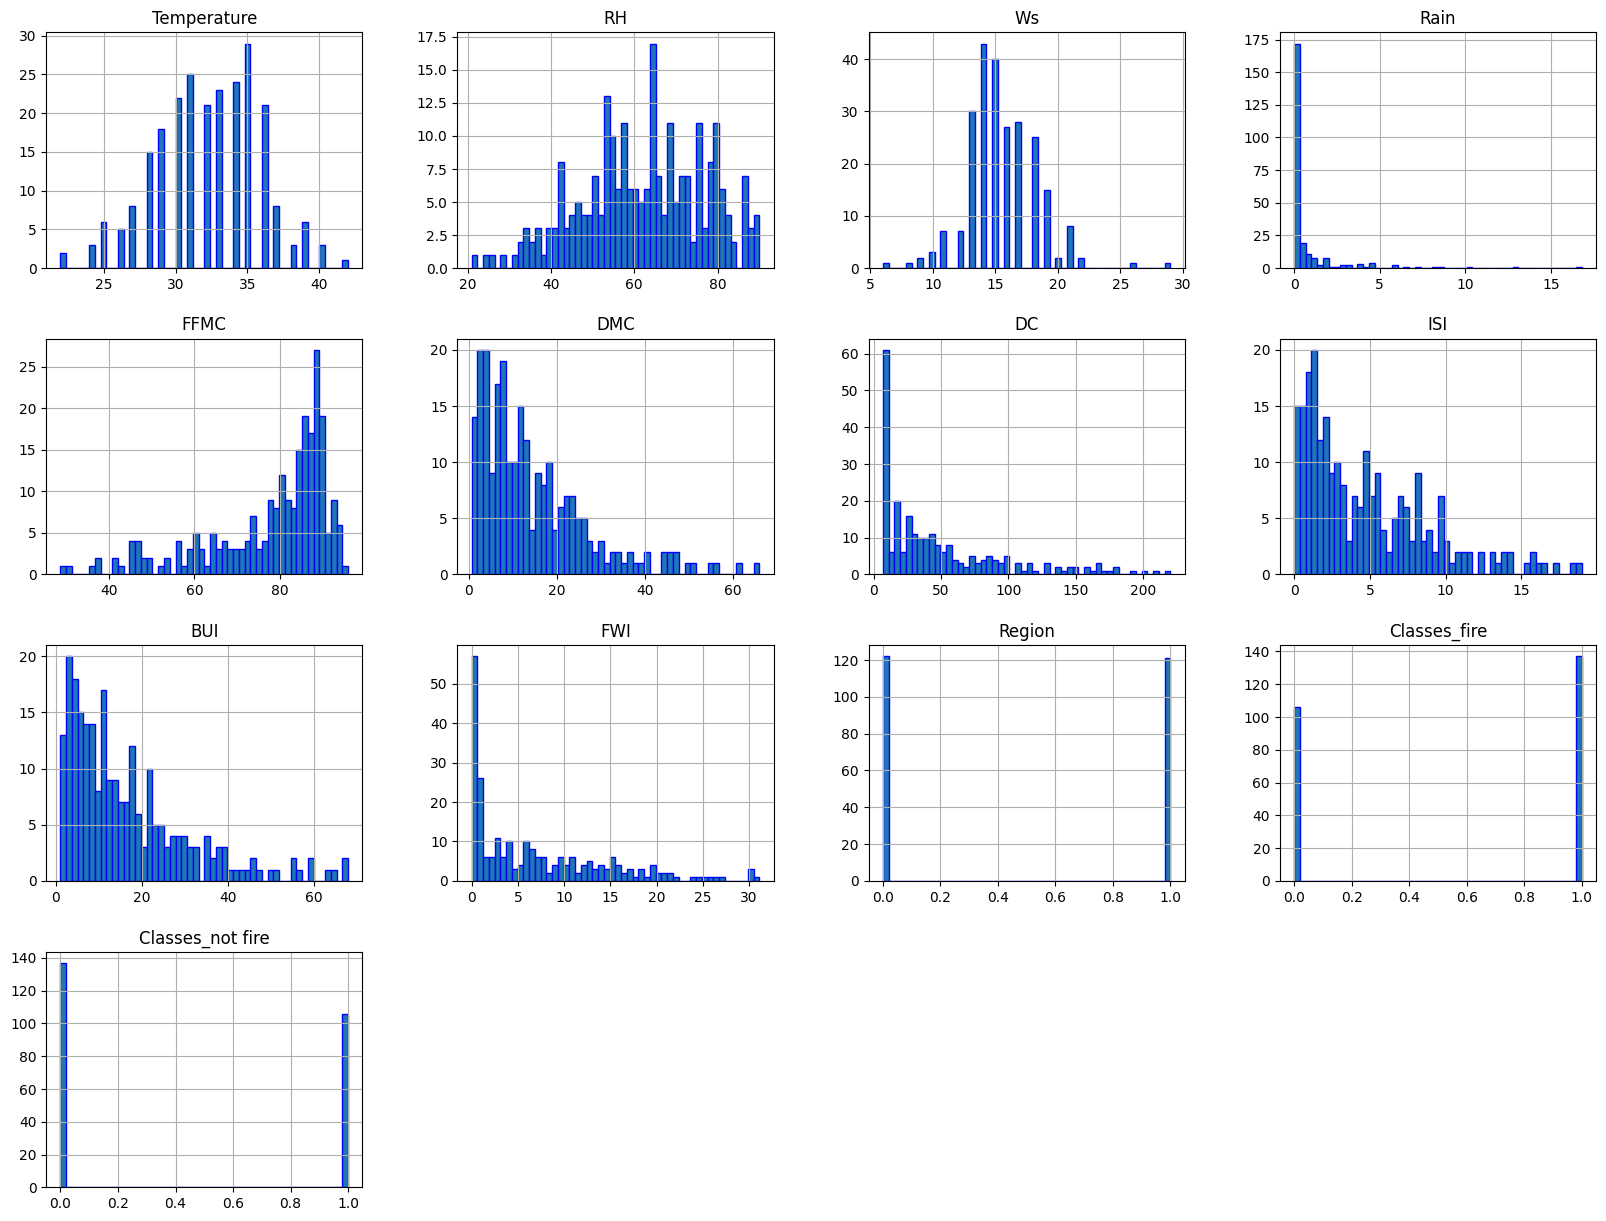

In [ ]:
# PLot density plot for all features
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

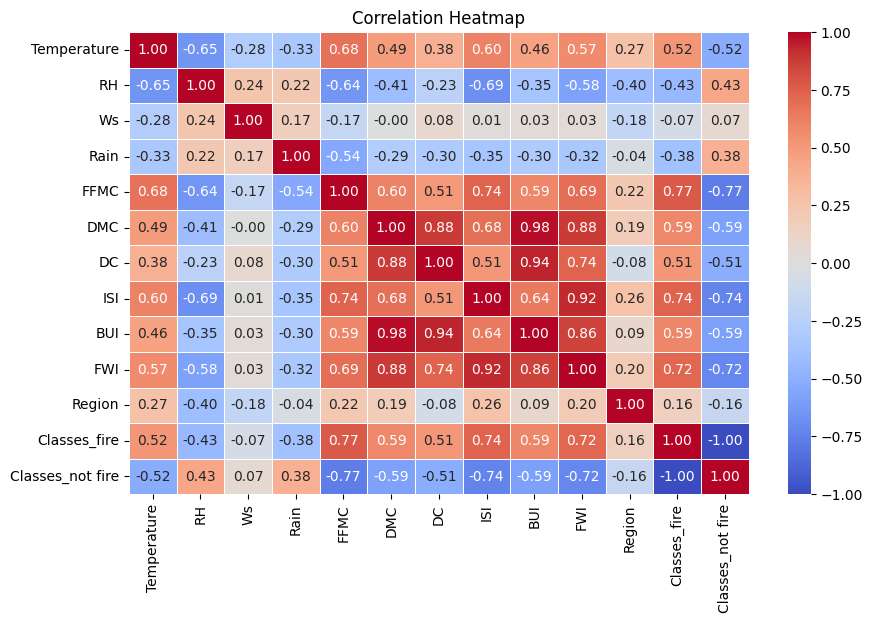

In [ ]:
# Creating a heatmap using seaborn

# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

From this correlation matrix I can highlight:

-  FWI is srongly correlated with ISI (0.92), DMC (0.88), BUI (0.86), and FFMC (0.69).
-  Temperure shows a positive correlation with FWI, while relative humidity  (RH) shows a significant negative correlation.
-  BUI and DMC have the highest correlations with each other.


## 3.Model Development, Evaluation and Testing

In [ ]:
# spliting the data into input and output variable
X=df.drop('FWI', axis=1)

y=df['FWI']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (60%) and a temporary (40%) datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

#Split Temporary Set into Testing (20%) and Unseen (20%)
X_test, X_unseen, y_test, y_unseen = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Print the shapes of the splits to verify
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")
print(f"Unseen set: {X_unseen.shape}, {y_unseen.shape}")

Training set: (145, 12), (145,)
Testing set: (49, 12), (49,)
Unseen set: (49, 12), (49,)


In [ ]:
#Standarzing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unseen_scaled = scaler.transform(X_unseen)

In [ ]:
X_train_scaled

array([[ 1.04845345, -0.11004294,  0.90716675, ..., -1.02090818,
         0.86428465, -0.86428465],
       [-0.30649976,  0.83651282, -1.02723294, ..., -1.02090818,
        -1.15702622,  1.15702622],
       [ 2.13241602, -1.46226545, -2.18787276, ...,  0.97952001,
         0.86428465, -0.86428465],
       ...,
       [-1.93244362,  0.90412395,  0.52028681, ..., -1.02090818,
        -1.15702622,  1.15702622],
       [ 0.50647217, -0.24526519,  0.13340688, ...,  0.97952001,
         0.86428465, -0.86428465],
       [-0.5774904 ,  0.97173508,  2.06780657, ..., -1.02090818,
        -1.15702622,  1.15702622]])

### Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# creating an object for my model
lr= LinearRegression()
# training the model
lr.fit(X_train_scaled, y_train)
# Make predictions
y_pred_linear = lr.predict(X_test_scaled)

In [ ]:
# evaluate the model using metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'R2 Score: {r2_score(y_test, y_pred_linear)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_linear)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_linear)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}')

R2 Score: 0.9911683075175027
MAE: 0.5490593963821173
MSE: 0.5753288912618479
RMSE: 0.7585043778791576


### Polynomial Regression Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias= False)

# Transform the input features to polynomial features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the Linear Regression model for Polynomial Regression
poly_model = LinearRegression()

# Fit the model on the polynomial training data
poly_model.fit(X_train_poly, y_train)

# Predict on the polynomial test data
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.9981381094362709
MAE: 0.24112446602831764
MSE: 0.1212903909193059
RMSE: 0.34826770008042074


### Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
ls_model = Lasso(alpha=0.09)

# Fit the model on the training data
ls_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lasso = ls_model.predict(X_test_scaled)


In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_lasso)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_lasso)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}')

R2 Score: 0.9875911135647002
MAE: 0.6467016987767222
MSE: 0.8083604460598841
RMSE: 0.8990886753039903


### Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
rd_model = Ridge()  # You can tune the alpha parameter

# Fit the model on the training data
rd_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = rd_model.predict(X_test_scaled)

In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_ridge)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_ridge)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_ridge)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}')

R2 Score: 0.9915332598921905
MAE: 0.545124621203452
MSE: 0.5515545529333052
RMSE: 0.7426671885395942


### ElasticNet Model

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet model
en_model = ElasticNet(alpha=0.9,l1_ratio=1)

# Fit the model on the training data
en_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_elasticnet = en_model.predict(X_test_scaled)

In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_elasticnet)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_elasticnet)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_elasticnet)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))}')

R2 Score: 0.9632536302267403
MAE: 1.1168888840081925
MSE: 2.393793513694616
RMSE: 1.5471889069194542


### Cross Validation and Hyperparameters tunning

##### Lasso Regression with Grid Search and Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ls_model = Lasso()
lasso_grid_search = GridSearchCV(estimator=ls_model, param_grid=lasso_param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train_scaled, y_train)
best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_model


Lasso(alpha=0.1)

In [ ]:
#Predictions
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_lasso)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_lasso)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}')

R2 Score: 0.98692088074274
MAE: 0.6700870289156484
MSE: 0.8520218741621278
RMSE: 0.923050309659299


#### Ridge Regression with Grid Search and Cross-Validation

In [ ]:
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train_scaled, y_train)
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_model

Ridge(alpha=1)

In [ ]:
#predictions
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_ridge)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_ridge)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_ridge)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}')

R2 Score: 0.9915332598921905
MAE: 0.545124621203452
MSE: 0.5515545529333052
RMSE: 0.7426671885395942


### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_test = tree_model.predict(X_test_scaled)

In [ ]:
# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_test, y_pred_test)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_test)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_test)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')

R2 Score: 0.9539510783072893
MAE: 1.075510204081633
MSE: 2.9997959183673477
RMSE: 1.7319918932741423


### 4. Modeling Conclusion

According to the metrics results **Polynomial Regression** delivers the best performance out of all the models tested. It gives the most accurate predictions and fits the data more precisely. Its high R2 score and low error values make it the top choice for this dataset.

### 5. Pickling the model and testing the model on unseen data

In [ ]:
import pickle

#Saving the Polynominal model
with open('poly_model.pkl', 'wb') as file:
    pickle.dump(poly_model, file)


In [ ]:
#Loading the models

# Polynomial regression model
with open('poly_model.pkl', 'rb') as file:
    loaded_poly_model = pickle.load(file)

In [ ]:
#Testing the model on unseen data
X_poly_unseen = poly.transform(X_unseen_scaled)
y_pred_poly_unseen = loaded_poly_model.predict(X_poly_unseen)

# evaluate the model using metrics

print(f'R2 Score: {r2_score(y_unseen, y_pred_poly_unseen)}')

print(f'MAE: {mean_absolute_error(y_unseen, y_pred_poly_unseen)}')

print(f'MSE: {mean_squared_error(y_unseen, y_pred_poly_unseen)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_unseen, y_pred_poly_unseen))}')

R2 Score: 0.7998003923059969
MAE: 0.561266072005113
MSE: 5.779344931504235
RMSE: 2.404026815887093


**Observations:**
- The model does an excellent job on the data it was trained and tested on, but it doesn’t perform well on new, unseen data. This suggests that while the model learned the training data very well, it struggles to make good predictions on different data. This problem is called overfitting, and it means the model may need some adjustments to work better on new data.

**Next Steps:** I will keep working on adjusting the parameters and refining the model to improve its performance on new data.